In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../datasets/balloons.csv')

In [4]:
data

,color,size,act,age,inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,ADULT,T
2,YELLOW,SMALL,STRETCH,ADULT,T
3,YELLOW,NaN,STRETCH,ADULT,T
4,YELLOW,SMALL,STRETCH,ADULT,T
...,...,...,...,...,...
95,PURPLE,LARGE,DIP,CHILD,F
96,PURPLE,LARGE,DIP,CHILD,F
97,PURPLE,LARGE,DIP,CHILD,F
98,PURPLE,LARGE,DIP,CHILD,F


In [5]:
data.isna().any()

color       False
size         True
act          True
age          True
inflated    False
dtype: bool

In [6]:
data.isna().sum()

color       0
size        1
act         1
age         1
inflated    0
dtype: int64

In [7]:
data.dropna(axis=0, inplace=True)

In [8]:
data.isna().sum()

color       0
size        0
act         0
age         0
inflated    0
dtype: int64

In [9]:
Y = data['inflated']
X = data.drop('inflated', axis=1)

In [10]:
# balansiranost u klasi Y

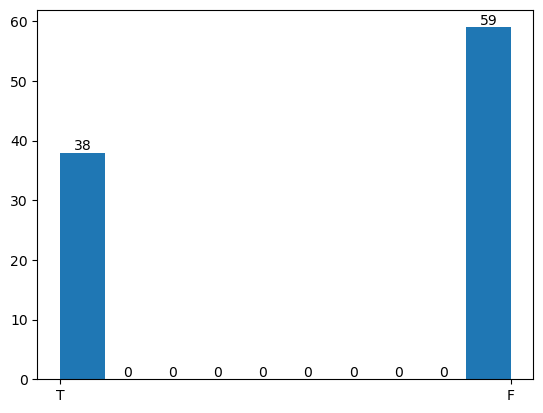

In [11]:
edges, lines, bins = plt.hist(Y)
plt.bar_label(bins)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
encoder = OrdinalEncoder()

In [16]:
encoder.fit(X_train)

OrdinalEncoder()

In [17]:
X_train = encoder.transform(X_train)

In [18]:
X_test = encoder.transform(X_test)

In [20]:
from sklearn.naive_bayes import CategoricalNB

In [21]:
model = CategoricalNB()

In [22]:
model.fit(X_train, y_train)

CategoricalNB()

In [23]:
model.category_count_

[array([[23., 21.],
        [17., 11.]]),
 array([[21., 23.],
        [16., 12.]]),
 array([[28., 16.],
        [ 0., 28.]]),
 array([[13.,  2., 29.],
        [28.,  0.,  0.]])]

In [24]:
model.class_count_

array([44., 28.])

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [26]:
confusion_matrix(y_train, model.predict(X_train))

array([[44,  0],
       [ 0, 28]])

In [28]:
confusion_matrix(y_test, model.predict(X_test))

array([[15,  0],
       [ 0, 10]])

In [31]:
# KLASIFIKACIJA TEKSTA 

X, y = read_data(...)

from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer()

dv.fit(X_train)

sparse_matrix = dv.transform(X_train)

X_train = pd.DataFrame(sparse_matrix.toarray(), columns=dv.feature_names_)

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

model.class_count_
model.feature_count_

